## Fit any function

Notebook to plot some 1D function, fit it with an MLP, create animation of training process

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.optim.lr_scheduler as optimscheduler

import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
## Define test function

def test_function(x):
    return np.sin(x)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
batches=12
batch_size=12


## Set x limits, training regime/distribution
x_train=np.linspace(-6,6,batches*batch_size,dtype=np.float32)
y_train=test_function(x_train)

## Randomly sample from within training regime for validation points
x_test=np.linspace(-6,6,200,dtype=np.float32)

In [5]:
## Generate batch indices
indices=np.random.randint(0,batches*batch_size,batches*batch_size)
np.random.shuffle(indices)

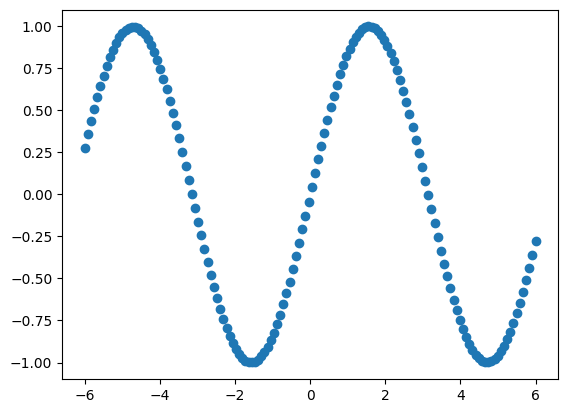

In [6]:
plt.plot(x_train,y_train,"o")

In [46]:
## Define an mlp
class MLP(nn.Module):
    def __init__(self,hidden=32):
        super().__init__()

        self.MLP=nn.Sequential(nn.Linear(1, hidden),
                                nn.ReLU(),
                                nn.Linear(hidden, hidden),
                                nn.ReLU(),
                                nn.Linear(hidden, hidden),
                                nn.ReLU(),
                                nn.Linear(hidden, 1))

    def forward(self, x):
        return self.MLP(x)
    
## Define loss function
loss_fn=nn.MSELoss()

In [51]:
model=MLP(32)
model.to(device)

epochs=10000

test_data=np.empty((epochs,len(x_test)))

optimizer = optim.Adam(model.parameters(),lr=0.01,weight_decay=0.01)
scheduler = optimscheduler.StepLR(optimizer,500,0.5)
#scheduler = optimscheduler.ExponentialLR(optimizer, gamma=0.999999)

losses=[]
lrs=[]

x_test_torch=torch.tensor(x_test).view(len(x_test), -1).to(device)

for aa in range(epochs):
    batch_loss=[]
    model.train()
    for bb in range(batches):
        batch_idx=indices[batch_size*bb:batch_size*(bb+1)]
        x_batch=torch.tensor(x_train[batch_idx]).view(batch_size, -1).to(device)
        y_batch=torch.tensor(y_train[batch_idx]).view(batch_size, -1).to(device)
        
        pred=model(x_batch)
        loss=loss_fn(pred,y_batch)
        loss.backward()
        optimizer.step()
        
    ## Test data for each epoch
    model.eval()
    test_data[aa]=model(x_test_torch).cpu().detach().numpy().squeeze()
    batch_loss.append((loss.cpu().detach().numpy()))
    scheduler.step()
    lrs.append(scheduler.get_last_lr())
    losses.append(np.mean(batch_loss))
        

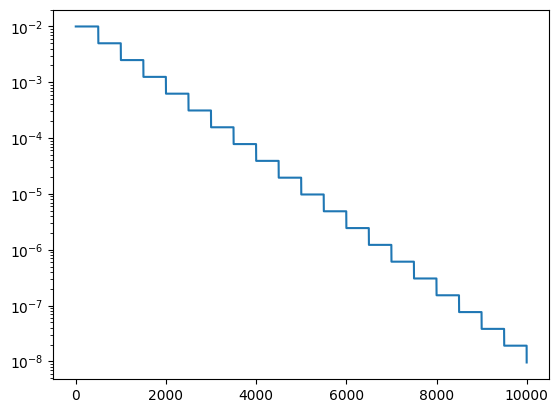

In [52]:
plt.plot(lrs)
plt.yscale("log")

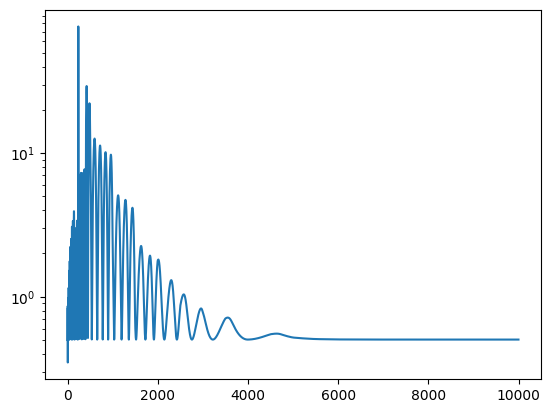

In [53]:
plt.plot(losses)
plt.yscale("log")

In [54]:
skip=10

## Animate below
fig, ax = plt.subplots(figsize=(11,7))
line0,=ax.plot(x_test,test_function(x_test),color="blue")
line1,=ax.plot(x_train,test_function(x_train),color="blue",marker="o",linestyle="None")
line2,=ax.plot([],[],color="red")


def animate_func(i):
    i*=skip
    if i % 100 == 0:
        print(i,',', end ='' )

    fig.canvas.draw()
    line2.set_data(x_test,test_data[i])
    return


anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = int(epochs/skip),
                               interval = 16, # in ms
                               )
plt.close()
HTML(anim.to_html5_video())

0 ,0 ,100 ,200 ,300 ,400 ,500 ,600 ,700 ,800 ,900 ,1000 ,1100 ,1200 ,1300 ,1400 ,1500 ,1600 ,1700 ,1800 ,1900 ,2000 ,2100 ,2200 ,2300 ,2400 ,2500 ,2600 ,2700 ,2800 ,2900 ,3000 ,3100 ,3200 ,3300 ,3400 ,3500 ,3600 ,3700 ,3800 ,3900 ,4000 ,4100 ,4200 ,4300 ,4400 ,4500 ,4600 ,4700 ,4800 ,4900 ,5000 ,5100 ,5200 ,5300 ,5400 ,5500 ,5600 ,5700 ,5800 ,5900 ,6000 ,6100 ,6200 ,6300 ,6400 ,6500 ,6600 ,6700 ,6800 ,6900 ,7000 ,7100 ,7200 ,7300 ,7400 ,7500 ,7600 ,7700 ,7800 ,7900 ,8000 ,8100 ,8200 ,8300 ,8400 ,8500 ,8600 ,8700 ,8800 ,8900 ,9000 ,9100 ,9200 ,9300 ,9400 ,9500 ,9600 ,9700 ,9800 ,9900 ,